In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from make_mymodel.csp import CSP
import os
from sklearn.svm import SVC
import pymysql

In [2]:
for i in range(100,109):
    dir_str = r'C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S'+ str(i)
    file_name = os.listdir(dir_str)
    filter_files = [file for file in file_name if file.endswith('.edf')]
    print(filter_files)

['S100R01.edf', 'S100R02.edf', 'S100R03.edf', 'S100R04.edf', 'S100R05.edf', 'S100R06.edf', 'S100R07.edf', 'S100R08.edf', 'S100R09.edf', 'S100R10.edf', 'S100R11.edf', 'S100R12.edf', 'S100R13.edf', 'S100R14.edf']
['S101R01.edf', 'S101R02.edf', 'S101R03.edf', 'S101R04.edf', 'S101R05.edf', 'S101R06.edf', 'S101R07.edf', 'S101R08.edf', 'S101R09.edf', 'S101R10.edf', 'S101R11.edf', 'S101R12.edf', 'S101R13.edf', 'S101R14.edf']
['S102R01.edf', 'S102R02.edf', 'S102R03.edf', 'S102R04.edf', 'S102R05.edf', 'S102R06.edf', 'S102R07.edf', 'S102R08.edf', 'S102R09.edf', 'S102R10.edf', 'S102R11.edf', 'S102R12.edf', 'S102R13.edf', 'S102R14.edf']
['S103R01.edf', 'S103R02.edf', 'S103R03.edf', 'S103R04.edf', 'S103R05.edf', 'S103R06.edf', 'S103R07.edf', 'S103R08.edf', 'S103R09.edf', 'S103R10.edf', 'S103R11.edf', 'S103R12.edf', 'S103R13.edf', 'S103R14.edf']
['S104R01.edf', 'S104R02.edf', 'S104R03.edf', 'S104R04.edf', 'S104R05.edf', 'S104R06.edf', 'S104R07.edf', 'S104R08.edf', 'S104R09.edf', 'S104R10.edf', 'S104

In [3]:
raw = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R03.edf',preload=True)
raw1 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R04.edf',preload=True)
raw2 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R05.edf',preload=True)
raw3 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R06.edf',preload=True)
raw4 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R07.edf',preload=True)
raw5 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R08.edf',preload=True)
raw6 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R09.edf',preload=True)
raw7 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R10.edf',preload=True)
raw8 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R11.edf',preload=True)
raw9 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R12.edf',preload=True)
raw10 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R13.edf',preload=True)
raw11 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S001\\S001R11.edf',preload=True)

Extracting EDF parameters from C:\Users\24242\Desktop\AI_Reference\data_bag\EEG-files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\24242\Desktop\AI_Reference\data_bag\EEG-files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\24242\Desktop\AI_Reference\data_bag\EEG-files\S001\S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\24242\Desktop\AI_Reference\data_bag\EEG-files\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF param

In [4]:
def choose_event_Epochs_data(raw):
    event,event_id = mne.events_from_annotations(raw)
    event_pick_id = [2,3]
    pick_event = mne.pick_events(event,include=event_pick_id)
    event_new_id = {'T1':2,'T3':3}
    epochs = mne.Epochs(raw,pick_event,event_new_id,tmin=-1,tmax=5,preload=True)
    label = epochs.events[:,-1]
    epochs.load_data().filter(l_freq=8,h_freq=12)
    data = epochs.get_data()
    print(data.shape,label.shape)
    return data,label

In [5]:
data,label = choose_event_Epochs_data(raw)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)
(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [6]:
data1,label1 = choose_event_Epochs_data(raw1)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [7]:
data2,label2 = choose_event_Epochs_data(raw2)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [8]:
data3,label3 = choose_event_Epochs_data(raw3)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [9]:
data4,label4 = choose_event_Epochs_data(raw4)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [10]:
data5,label5 = choose_event_Epochs_data(raw5)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


In [11]:
data6,label6 = choose_event_Epochs_data(raw6)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [12]:
data7,label7 = choose_event_Epochs_data(raw7)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [13]:
data8,label8 = choose_event_Epochs_data(raw8)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [14]:
data9,label9 = choose_event_Epochs_data(raw9)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [15]:
data10,label10 = choose_event_Epochs_data(raw10)
data11,label11 = choose_event_Epochs_data(raw11)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 961 original time points ...
1 bad epochs dropped


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


(14, 64, 961) (14,)


[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s


In [16]:
def gather_data(data,data1,label,label1):
    data2 = np.concatenate((data,data1),axis=0)
    label2 = np.append(label,label1)
    return data2,label2
    

In [17]:
data_2,label_2 = gather_data(data,data1,label,label1)
data_3,label_3 = gather_data(data_2,data2,label_2,label2)
data_4,label_4 = gather_data(data_3,data3,label_3,label3)
data_5,label_5 = gather_data(data_4,data4,label_4,label4)
data_6,label_6 = gather_data(data_5,data5,label_5,label5)
data_all,label_all = gather_data(data_6,data6,label_6,label6)
data_all,label_all = gather_data(data_all,data7,label_all,label7)
Test_data,Test_label = gather_data(data8,data9,label8,label9)
Test_data,Test_label = gather_data(Test_data,data10,Test_label,label10)
Test_data,Test_label = gather_data(Test_data,data11,Test_label,label11)

In [18]:
data_all.shape

(112, 64, 961)

In [19]:
label_all.shape

(112,)

In [20]:
Test_data.shape,Test_label.shape

((56, 64, 961), (56,))

In [21]:
# 构建管道模型
clf = Pipeline([('csp',CSP(n_components=6)),('lda',LinearDiscriminantAnalysis())])
clf.fit(data_all,label_all)

Pipeline(steps=[('csp', CSP(n_components=6)),
                ('lda', LinearDiscriminantAnalysis())])

In [22]:
y_pred = clf.predict(Test_data)
accuracy_score(y_pred,Test_label)

0.6964285714285714

In [23]:
# 利用随机森林分类进行预测
from sklearn.ensemble import RandomForestClassifier
number = [10,20,30,40,50,60,70,80,90,100]
acc_list = []
def clf_create(data_all,label_all,data,label):
    for i in number:
        clf = Pipeline([('csp',CSP(n_components=6)),('rf',RandomForestClassifier(n_estimators=i))])
        clf.fit(data_all,label_all)
        y_pred = clf.predict(data)
        acc = accuracy_score(y_pred,label)
        acc_list.append(acc)
    print(acc_list)
    plt.plot(number,acc_list)
    plt.show()

[0.5892857142857143, 0.6607142857142857, 0.5714285714285714, 0.6071428571428571, 0.625, 0.625, 0.625, 0.6071428571428571, 0.5714285714285714, 0.5714285714285714]


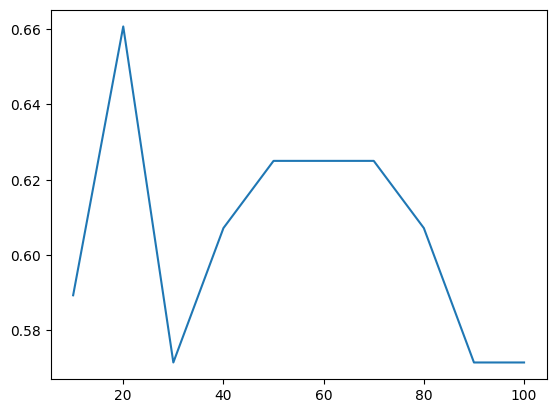

In [24]:
clf_create(data_all,label_all,Test_data,Test_label)

In [25]:
# 利用CSP与svm构造管道
clf = Pipeline([('csp',CSP(n_components=6)),('svm',SVC(C=0.5,kernel='linear',max_iter=1000,probability=True))])
clf.fit(data_all,label_all)

Pipeline(steps=[('csp', CSP(n_components=6)),
                ('svm',
                 SVC(C=0.5, kernel='linear', max_iter=1000, probability=True))])

In [26]:
y_pred_svm = clf.predict(Test_data)
acc_svm = accuracy_score(y_pred=y_pred,y_true=Test_label)

In [27]:
acc_svm

0.6964285714285714

In [28]:
raw12 = mne.io.read_raw_edf('C:\\Users\\24242\\Desktop\\AI_Reference\\data_bag\\EEG-files\\S002\\S002R03.edf')

Extracting EDF parameters from C:\Users\24242\Desktop\AI_Reference\data_bag\EEG-files\S002\S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [29]:
raw12.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>

In [30]:
event,event_id = mne.events_from_annotations(raw12)
print(event)
print(event_id)

Used Annotations descriptions: ['T0', 'T1', 'T2']
[[    0     0     1]
 [  656     0     2]
 [ 1312     0     1]
 [ 1968     0     3]
 [ 2624     0     1]
 [ 3280     0     3]
 [ 3936     0     1]
 [ 4592     0     2]
 [ 5248     0     1]
 [ 5904     0     2]
 [ 6560     0     1]
 [ 7216     0     3]
 [ 7872     0     1]
 [ 8528     0     3]
 [ 9184     0     1]
 [ 9840     0     2]
 [10496     0     1]
 [11152     0     3]
 [11808     0     1]
 [12464     0     2]
 [13120     0     1]
 [13776     0     2]
 [14432     0     1]
 [15088     0     3]
 [15744     0     1]
 [16400     0     2]
 [17056     0     1]
 [17712     0     3]
 [18368     0     1]
 [19024     0     2]]
{'T0': 1, 'T1': 2, 'T2': 3}


In [31]:
y_pred_class = clf.predict_proba(Test_data)
y_pred_class

array([[0.88013145, 0.11986855],
       [0.66503161, 0.33496839],
       [0.62509557, 0.37490443],
       [0.95474809, 0.04525191],
       [0.64718731, 0.35281269],
       [0.84980972, 0.15019028],
       [0.97731993, 0.02268007],
       [0.53462498, 0.46537502],
       [0.18230735, 0.81769265],
       [0.90609905, 0.09390095],
       [0.78163418, 0.21836582],
       [0.05248376, 0.94751624],
       [0.58959249, 0.41040751],
       [0.66006088, 0.33993912],
       [0.73223599, 0.26776401],
       [0.27582873, 0.72417127],
       [0.90874527, 0.09125473],
       [0.40138725, 0.59861275],
       [0.9081856 , 0.0918144 ],
       [0.30211939, 0.69788061],
       [0.3754146 , 0.6245854 ],
       [0.93648422, 0.06351578],
       [0.65642949, 0.34357051],
       [0.27710471, 0.72289529],
       [0.68522139, 0.31477861],
       [0.5       , 0.5       ],
       [0.64255364, 0.35744636],
       [0.57030627, 0.42969373],
       [0.91734418, 0.08265582],
       [0.07698619, 0.92301381],
       [0.

In [32]:
connect = pymysql.connect(host='localhost',port=3306,db='ml-eeg-classification',user='chaos',password='Aa112233')

In [33]:
db = connect.cursor()

In [36]:
for i in range(len(number)):
    num = number[i]
    id = i + 1
    acc = acc_list[i]
    sql =  "INSERT INTO randomforest_data VALUES (%s, %s, %s)"
    
    db.execute(sql,(id,num,acc))
connect.commit()
